# Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the dataset Now

In [2]:
friends = pd.read_csv(r"C:\Users\Saurabh\Projects\friends_episodes_v2.csv")


In [3]:
friends.head(5)

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [4]:
friends.loc[233,'Episode_Title'] = "The Last One I"
friends.loc[234,"Episode_Title"] = "The Last One II"

In [5]:
friends.duplicated().sum()

0

In [6]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    int64  
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 14.8+ KB


# Changing the data type of Season to object.

In [7]:
friends['Season'] = friends['Season'].astype("object")

In [8]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    object 
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 14.8+ KB


# Exploratory Data Analysis - EDA


In [9]:
friends['Season'].value_counts().sort_index()

1     23
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: Season, dtype: int64

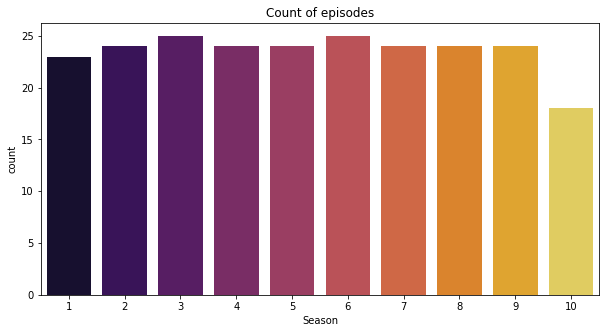

In [10]:
plt.figure(figsize=(10,5))
plt.xlabel("Season")
plt.title("Count of episodes")
sns.countplot(x = "Season", data = friends,palette='inferno')

From above table and plot, we can observe that Season 3 and Season 6 has the maximum episodes i.e 25. Also, Season 10 has the minimum episodes i.e 18.

In [11]:
season_duration = friends.groupby('Season').Duration.sum().to_frame().reset_index()
season_duration

,Season,Duration
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


(300.0, 600.0)

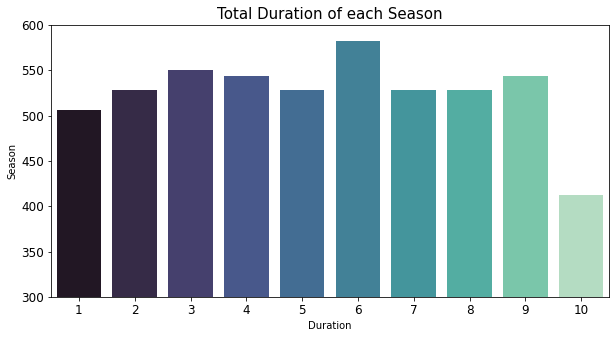

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='mako')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(300, 600)

 From above table and plot, longest season 6 is with 582 mins and shortest season 10 is with 421 mins.



In [14]:
season_stars = friends.groupby('Season').mean().Stars.to_frame().reset_index()
season_stars.columns = ['Season','Average Stars']
season_stars = season_stars.sort_values('Average Stars', ascending=False)
season_stars

,Season,Average Stars
9,10,8.677778
4,5,8.637500
5,6,8.496000
3,4,8.475000
1,2,8.458333
7,8,8.445833
6,7,8.437500
2,3,8.408000
0,1,8.317391
8,9,8.291667


(8.0, 9.0)

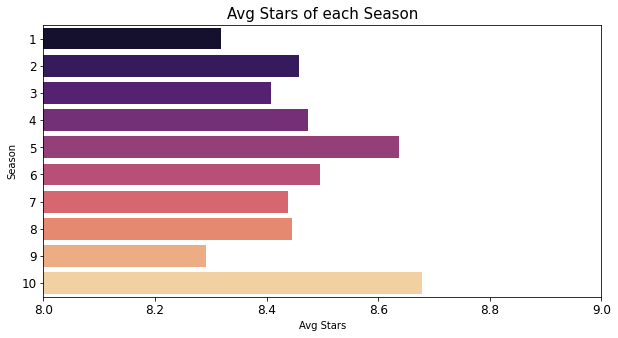

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_stars.Season, x=season_stars['Average Stars'], palette='magma', orient='h')
plt.title('Avg Stars of each Season', fontsize=15)
plt.xlabel('Avg Stars')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(8, 9)

From above table and plot, it is quite evident that 1st season has the lowest average star rating while the last season has the most average star ratings

In [16]:
season_pop_epi = friends[['Episode_Title', 'Stars']].sort_values('Stars', ascending=False).head(10).reset_index(drop=True)
season_pop_epi

,Episode_Title,Stars
0,The Last One II,9.7
1,The One Where Everybody Finds Out,9.7
2,The Last One I,9.5
3,The One with the Embryos,9.5
4,The One with the Prom Video,9.4
5,The One with the Rumor,9.3
6,The One with the Proposal,9.3
7,The One with the Videotape,9.3
8,The One with Monica and Chandler's Wedding: Pa...,9.2
9,The One with Ross's Wedding,9.2


(9.0, 10.0)

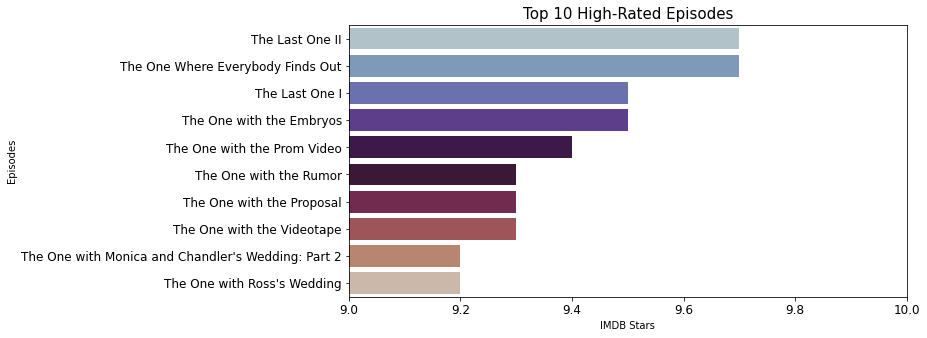

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Episode_Title, x=season_pop_epi.Stars, palette='twilight', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(9, 10)

From above table and plot, it is quite evident that season finale and "The One Where Everybody Finds Out" have the highest Stars.

In [18]:
director_count = friends.groupby("Director").Episode_Title.count().sort_values(ascending=False)
director_count

Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
Gail Mancuso            14
James Burrows           14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Robby Benson             6
Shelley Jensen           6
Terry Hughes             5
Sheldon Epps             3
Dana De Vally Piazza     3
Roger Christiansen       2
Pamela Fryman            2
Thomas Schlamme          2
Steve Zuckerman          2
Alan Myerson             2
David Steinberg          1
Arlene Sanford           1
Andrew Tsao              1
Todd Holland             1
Ellen Gittelsohn         1
Joe Regalbuto            1
Paul Lazarus             1
Sam Simon                1
Stephen Prime            1
Mary Kay Place           1
Name: Episode_Title, dtype: int64

In [19]:
director_count.count()

28

In [20]:
top10_dir = director_count.head(10).reset_index()
top10_dir

,Director,Episode_Title
0,Gary Halvorson,54
1,Kevin Bright,54
2,Michael Lembeck,24
3,Gail Mancuso,14
4,James Burrows,14
5,Peter Bonerz,12
6,Ben Weiss,10
7,David Schwimmer,10
8,Robby Benson,6
9,Shelley Jensen,6


Text(0, 0.5, 'No Of Episodes')

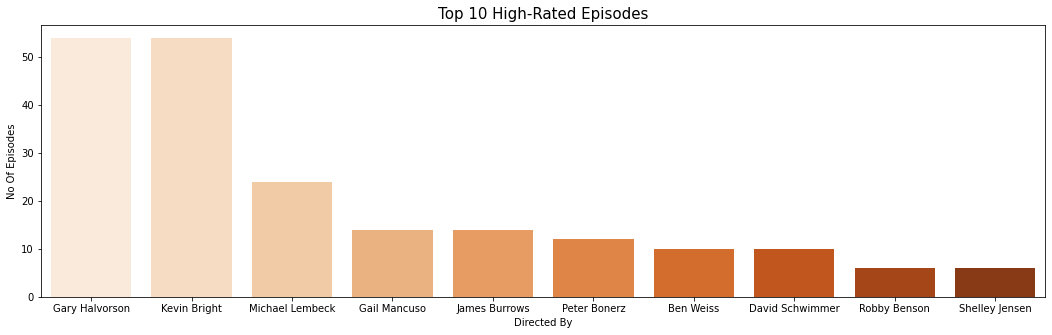

In [21]:
plt.figure(figsize=(18,5))
sns.barplot(x=top10_dir['Director'], y=top10_dir['Episode_Title'], palette='Oranges')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('Directed By')
plt.ylabel('No Of Episodes')

In [22]:
director_1 = director_count.reset_index()
director_1.columns= ["Director","Episode Count"]

director_1 = director_1[director_1['Episode Count'] == 1]
director_1

,Director,Episode Count
18,David Steinberg,1
19,Arlene Sanford,1
20,Andrew Tsao,1
21,Todd Holland,1
22,Ellen Gittelsohn,1
23,Joe Regalbuto,1
24,Paul Lazarus,1
25,Sam Simon,1
26,Stephen Prime,1
27,Mary Kay Place,1


In [23]:
Director_Rating = friends.groupby("Director").Stars.agg(['count','mean']).sort_values(by="mean")
print(Director_Rating)

                      count      mean
Director                             
Todd Holland              1  8.000000
Thomas Schlamme           2  8.050000
Arlene Sanford            1  8.100000
Steve Zuckerman           2  8.100000
Robby Benson              6  8.183333
Roger Christiansen        2  8.200000
Paul Lazarus              1  8.200000
Terry Hughes              5  8.220000
Ellen Gittelsohn          1  8.300000
Sam Simon                 1  8.300000
Ben Weiss                10  8.300000
Peter Bonerz             12  8.325000
Gail Mancuso             14  8.357143
Dana De Vally Piazza      3  8.400000
Stephen Prime             1  8.400000
Gary Halvorson           54  8.401852
Shelley Jensen            6  8.433333
Alan Myerson              2  8.450000
Sheldon Epps              3  8.466667
David Steinberg           1  8.500000
Mary Kay Place            1  8.500000
James Burrows            14  8.514286
Michael Lembeck          24  8.520833
David Schwimmer          10  8.540000
Andrew Tsao 